# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure out what works (or better yet what doesn't work) before scaling up.

In [1]:
import zipfile

# Commented out so we can run all cells when reloading notebook

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

--2022-02-27 11:10:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.214.16, 142.251.36.16, 216.58.208.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.214.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104,47M  9,96MB/s    in 11s     

2022-02-27 11:10:36 (9,20 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the begining of any machine learning project is becoming one with the data. And for a computer vision project... this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg 1647351.jpg 2238681.jpg 2824680.jpg 3375959.jpg 417368.jpg
100135.jpg  1650002.jpg 2238802.jpg 2825100.jpg 3381560.jpg 4176.jpg
101312.jpg  165639.jpg  2254705.jpg 2826987.jpg 3382936.jpg 42125.jpg
1021458.jpg 1658186.jpg 225990.jpg  2832499.jpg 3386119.jpg 421476.jpg
1032846.jpg 1658443.jpg 2260231.jpg 2832960.jpg 3388717.jpg 421561.jpg
10380.jpg   165964.jpg  2268692.jpg 285045.jpg  3389138.jpg 438871.jpg
1049459.jpg 167069.jpg  2271133.jpg 285147.jpg  3393547.jpg 43924.jpg
1053665.jpg 1675632.jpg 227576.jpg  2855315.jpg 3393688.jpg 440188.jpg
1068516.jpg 1678108.jpg 2283057.jpg 2856066.jpg 3396589.jpg 442757.jpg
1068975.jpg 168006.jpg  2286639.jpg 2859933.jpg 339891.jpg  443210.jpg
1081258.jpg 1682496.jpg 2287136.jpg 286219.jpg  3417789.jpg 444064.jpg
1090122.jpg 1684438.jpg 2291292.jpg 2862562.jpg 3425047.jpg 444709.jpg
1093966.jpg 168775.jpg  229323.jpg  2865730.jpg 3434983.jpg 447557.jpg
1098844.jpg 1697339.jpg 2300534.jpg 2878151.jpg 3435358.jpg 461187.jpg
1100074.jp

In [5]:
import os

# Walk through the pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [6]:
# Another way to find out how many images are in a directory
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's the class names programmatically.

In [7]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted(item.name for item in data_dir.glob("*"))) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + "/" + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape: {img.shape}") # Show the shape of the image
    
    return img

['1264154.jpg']
Image shape: (289, 512, 3)


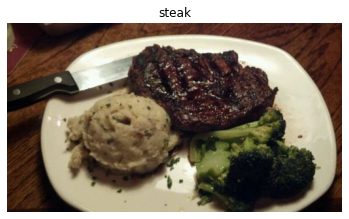

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train",
                        target_class="steak")

🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also refered to as **normalize**) their pixel values by dividing the image arrays by 255 (since 255 ist the maximum pixel value).

In [10]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.36470588, 0.30588235, 0.23137255],
        [0.34117647, 0.28235294, 0.20784314],
        [0.31764706, 0.25882353, 0.17647059],
        ...,
        [0.21568627, 0.0745098 , 0.02745098],
        [0.22745098, 0.09411765, 0.04705882],
        [0.25490196, 0.12156863, 0.0745098 ]],

       [[0.36862745, 0.30980392, 0.23529412],
        [0.36078431, 0.30196078, 0.22745098],
        [0.34509804, 0.28627451, 0.20392157],
        ...,
        [0.23137255, 0.09803922, 0.05882353],
        [0.23529412, 0.10196078, 0.05490196],
        [0.24705882, 0.11372549, 0.06666667]],

       [[0.34509804, 0.29411765, 0.21960784],
        [0.36470588, 0.30588235, 0.22352941],
        [0.37254902, 0.31372549, 0.23137255],
        ...,
        [0.24313725, 0.10980392, 0.07058824],
        [0.22352941, 0.09803922, 0.05490196],
        [0.21176471, 0.08627451, 0.04313725]],

       ...,

       [[0.12941176, 0.0627451 , 0.02352941],
        [0.1372549 , 0.07058824, 0.03137255],
        [0.14509804, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, also called normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255.)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Conv2D(filters=10,
                                   kernel_size=3,
                                   activation="relu",
                                   input_shape=(224, 224, 3)))
model_1.add(tf.keras.layers.Conv2D(10, 3, activation="relu"))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                      padding="valid"))
model_1.add(tf.keras.layers.Conv2D(10, 3, activation="relu"))
model_1.add(tf.keras.layers.Conv2D(10, 3, activation="relu"))
model_1.add(tf.keras.layers.MaxPool2D(2))
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-02-27 11:10:42.027168: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-27 11:10:42.027505: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-02-27 11:10:42.216389: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/5


2022-02-27 11:10:42.390587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.5988 - accuracy: 0.6873

2022-02-27 11:10:46.636648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 6s 108ms/step - loss: 0.5988 - accuracy: 0.6873 - val_loss: 0.4907 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 4s 94ms/step - loss: 0.4707 - accuracy: 0.7873 - val_loss: 0.3897 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 4s 93ms/step - loss: 0.4313 - accuracy: 0.8040 - val_loss: 0.3701 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 4s 93ms/step - loss: 0.4077 - accuracy: 0.8280 - val_loss: 0.4089 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 5s 95ms/step - loss: 0.3982 - accuracy: 0.8253 - val_loss: 0.3739 - val_accuracy: 0.8420


## Using the same model as before (Notebook 02)

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the TensorFlow playground:
https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.62395&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate TensorFlow playground model
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Flatten(input_shape=(224, 224, 3)))
model_2.add(tf.keras.layers.Dense(4, activation="relu"))
model_2.add(tf.keras.layers.Dense(4, activation="relu"))
model_2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
 1/47 [..............................] - ETA: 11s - loss: 0.6971 - accuracy: 0.4062

2022-02-27 11:11:06.088255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 1.7398 - accuracy: 0.4893

2022-02-27 11:11:09.451757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 5s 95ms/step - loss: 1.7398 - accuracy: 0.4893 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 4s 92ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 4s 91ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 4s 90ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 4s 93ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [13]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

Despite having 20x more parameters than our CNN (model_1), model_2 performs worse (in the video it actually didn't pass 50% accuracy). Let's try and improve it.

In [15]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step ip up a notch)
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Flatten(input_shape=(224, 224, 3)))
model_3.add(tf.keras.layers.Dense(100, activation="relu"))
model_3.add(tf.keras.layers.Dense(100, activation="relu"))
model_3.add(tf.keras.layers.Dense(100, activation="relu"))
model_3.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


2022-02-27 11:11:28.222644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 2.8998 - accuracy: 0.6153

2022-02-27 11:11:32.034858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 5s 104ms/step - loss: 2.8998 - accuracy: 0.6153 - val_loss: 1.8801 - val_accuracy: 0.5880
Epoch 2/5
47/47 [==============================] - 5s 100ms/step - loss: 0.7860 - accuracy: 0.6993 - val_loss: 1.1650 - val_accuracy: 0.5240
Epoch 3/5
47/47 [==============================] - 5s 99ms/step - loss: 0.8300 - accuracy: 0.7113 - val_loss: 0.8098 - val_accuracy: 0.6520
Epoch 4/5
47/47 [==============================] - 5s 100ms/step - loss: 0.7833 - accuracy: 0.7113 - val_loss: 0.5164 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 5s 101ms/step - loss: 0.5131 - accuracy: 0.7800 - val_loss: 0.4218 - val_accuracy: 0.8120


In [16]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Model_3 still performs worse despite having almost 500x the amount of trainable parameters compared to our CNN model.

🔑 **Note:** You can think of trainable parameters as **patterns a model can learn from data.** Intuitvely, you might think more is better. And in lots of cases it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hende a higher number of possible learnable patters, a **convolutional neural network seeks to sort out and learn the most important patterns in an image.** So even though there are less learnable parameters in our convolutional neural network, there are often more helpful in deciphering between different **features** in an image.

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['937133.jpg']
Image shape: (384, 512, 3)
['132484.jpg']
Image shape: (382, 512, 3)


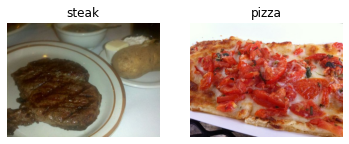

In [17]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [18]:
# Define directory dataset paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than looking at all ~10.000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10.000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10.000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health... https://twitter.com/ylecun/status/989610208497360896?lang=de

In [20]:
# Create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [23]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # Type of data your're working with
                                               batch_size=32) # Size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
# Get a sample of a training data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_dat
len(images), len(labels)

(32, 32)

In [27]:
# How many batches are there?
len(train_data), 1500/32

(47, 46.875)

In [30]:
# Get the first two images
images[0], images[0].shape

(array([[[0.47058827, 0.40784317, 0.34509805],
         [0.4784314 , 0.427451  , 0.3647059 ],
         [0.48627454, 0.43529415, 0.37254903],
         ...,
         [0.8313726 , 0.70980394, 0.48627454],
         [0.8431373 , 0.73333335, 0.5372549 ],
         [0.87843144, 0.7725491 , 0.5882353 ]],
 
        [[0.50980395, 0.427451  , 0.36078432],
         [0.5058824 , 0.42352945, 0.35686275],
         [0.5137255 , 0.4431373 , 0.3647059 ],
         ...,
         [0.82745105, 0.7058824 , 0.48235297],
         [0.82745105, 0.70980394, 0.5058824 ],
         [0.8431373 , 0.73333335, 0.5372549 ]],
 
        [[0.5254902 , 0.427451  , 0.34901962],
         [0.5372549 , 0.43921572, 0.36078432],
         [0.5372549 , 0.45098042, 0.36078432],
         ...,
         [0.82745105, 0.7019608 , 0.4784314 ],
         [0.82745105, 0.7058824 , 0.49411768],
         [0.8352942 , 0.7176471 , 0.5137255 ]],
 
        ...,
 
        [[0.77647066, 0.5647059 , 0.2901961 ],
         [0.7803922 , 0.53333336, 0.22352

In [31]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment. As you keep experimenting, you try to beat the baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amound of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [35]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.losses import BinaryCrossentropy

In [34]:
# Create the model (this will be our baseline, a 3 layer convolutional neural network)
model_4 = Sequential()
model_4.add(Conv2D(filters=10, # filters is the number of sliding windows going across an input (higher = more complex model)
                   kernel_size=3, # the size of the sliding image going across an input
                   strides=1, # size of the step the sliding window takes across an input
                   padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
                   activation="relu",
                   input_shape=(224, 224, 3))) # input layer (specify input shape)
model_4.add(Conv2D(10, 3, activation="relu"))
model_4.add(Conv2D(10, 3, activation="relu"))
model_4.add(Flatten())
model_4.add(Dense(1, activation="sigmoid")) # output layer (working with binary classification so only 1 output neuron)

In [37]:
# Compile the model
model_4.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [39]:
# Get a summary of our model
model_4.summary()

# Output shape gets smaller because of padding="same"

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [41]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [42]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of sample data and labels
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


2022-02-27 12:35:04.100016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 2.0190 - accuracy: 0.5553

2022-02-27 12:35:08.147983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 5s 107ms/step - loss: 2.0190 - accuracy: 0.5553 - val_loss: 0.6510 - val_accuracy: 0.5660
Epoch 2/5
47/47 [==============================] - 4s 93ms/step - loss: 0.5830 - accuracy: 0.6853 - val_loss: 0.4259 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 4s 93ms/step - loss: 0.4558 - accuracy: 0.8027 - val_loss: 0.4420 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 4s 92ms/step - loss: 0.4186 - accuracy: 0.8213 - val_loss: 0.4172 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 4s 92ms/step - loss: 0.3472 - accuracy: 0.8593 - val_loss: 0.3651 - val_accuracy: 0.8520


In [43]:
model_1.evaluate(test_data)

 1/16 [>.............................] - ETA: 2s - loss: 0.3438 - accuracy: 0.8438

2022-02-27 12:35:55.921322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 66ms/step - loss: 0.3739 - accuracy: 0.8420


[0.37391799688339233, 0.8420000672340393]

In [44]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### 5. Evaluating our model

It looks like our model is learning something. Let's evaluate it!

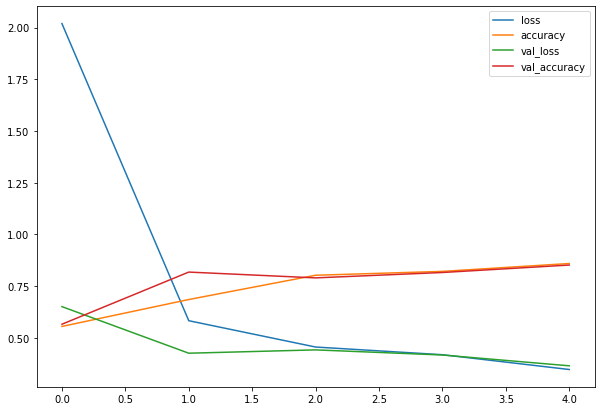

In [47]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [52]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
    """
    Returns seperate loss curves for training and validation metrics.
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"])) # how many epochs did we run for?
    
    # Plot loss
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()
    
    # Plot accuracy
    plt.figure() # Create a new figure
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()

🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset **too well** and thus the model's ability to generalize to unseen data will be diminished.

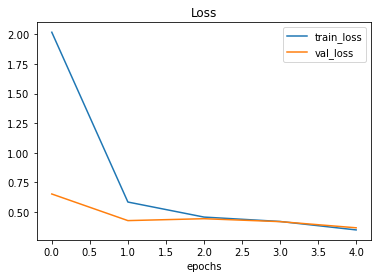

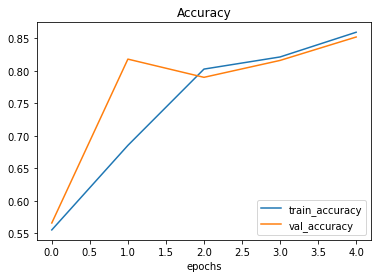

In [53]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

🔑 **Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting**.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

1. Create a baseline
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Ways to reduce overfitting:

* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data …

> 🔑 **Note:** Reducing overfitting is also known as **regularization**.

In [59]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential()
model_5.add(Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)))
model_5.add(MaxPool2D(pool_size=2))
model_5.add(Conv2D(10, 3, activation="relu"))
model_5.add(MaxPool2D())
model_5.add(Conv2D(10, 3, activation="relu"))
model_5.add(MaxPool2D())
model_5.add(Flatten())
model_5.add(Dense(1, activation="sigmoid"))

In [60]:
# Compile the model
model_5.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [61]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


2022-02-27 13:03:39.229392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.6669 - accuracy: 0.5740

2022-02-27 13:03:43.382775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 6s 109ms/step - loss: 0.6669 - accuracy: 0.5740 - val_loss: 0.5545 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 5s 95ms/step - loss: 0.4786 - accuracy: 0.7793 - val_loss: 0.3797 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 4s 94ms/step - loss: 0.4253 - accuracy: 0.8107 - val_loss: 0.3576 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 4s 93ms/step - loss: 0.4244 - accuracy: 0.8100 - val_loss: 0.3453 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 4s 91ms/step - loss: 0.3861 - accuracy: 0.8313 - val_loss: 0.3410 - val_accuracy: 0.8620


In [63]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 10)      

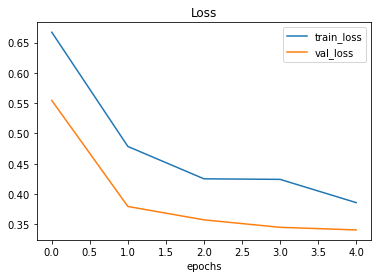

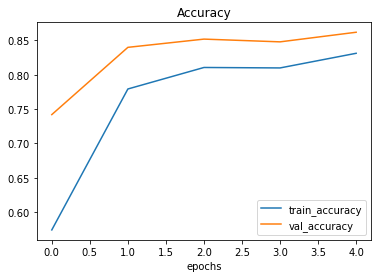

In [64]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [66]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns.
Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [69]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # For demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


🔑 **Note:** Data autmentation is usually **only performed on the training data**. Using `ImageDataGenerator` built-in data augmentation parameters, images are left as they are in the directories but are modified as they are loaded into the model.

Finally, let's visualize some augmented data!

In [70]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, only images are

Showing image number 7


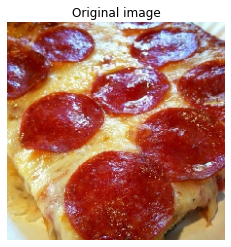

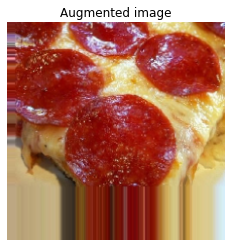

In [81]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32
print(f"Showing image number {random_number}")
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False);

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [82]:
# Create a model (same as model_5)
model_6 = Sequential()
model_6.add(Conv2D(10, 3, activation="relu"))
model_6.add(MaxPool2D(pool_size=2))
model_6.add(Conv2D(10, 3, activation="relu"))
model_6.add(MaxPool2D()),
model_6.add(Conv2D(10, 3, activation="relu"))
model_6.add(MaxPool2D())
model_6.add(Flatten())
model_6.add(Dense(1, activation="sigmoid"))

# Compile the model
model_6.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # Fitting model_6 on augmented data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


2022-02-27 16:54:50.134469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 1.1944 - accuracy: 0.5840

2022-02-27 16:55:01.340005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 13s 262ms/step - loss: 1.1944 - accuracy: 0.5840 - val_loss: 0.6948 - val_accuracy: 0.4940
Epoch 2/5
47/47 [==============================] - 12s 246ms/step - loss: 0.7017 - accuracy: 0.6327 - val_loss: 0.7053 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 12s 247ms/step - loss: 0.6929 - accuracy: 0.5027 - val_loss: 0.6889 - val_accuracy: 0.5080
Epoch 4/5
47/47 [==============================] - 12s 245ms/step - loss: 0.6918 - accuracy: 0.4847 - val_loss: 0.6814 - val_accuracy: 0.5020
Epoch 5/5
47/47 [==============================] - 12s 249ms/step - loss: 0.6901 - accuracy: 0.4933 - val_loss: 0.6760 - val_accuracy: 0.5060


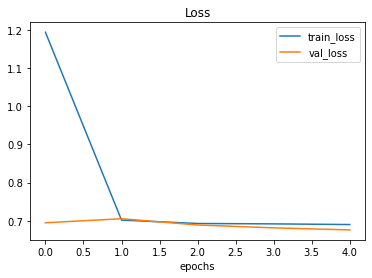

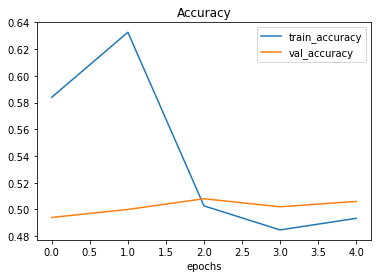

In [83]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [84]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            shuffle=True, # shuffle data this time
                                                                            class_mode="binary")

Found 1500 images belonging to 2 classes.


In [86]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # fitting on augmented and shuffled data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data)) 

Epoch 1/5


2022-02-27 17:11:29.681320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.6896 - accuracy: 0.5453

2022-02-27 17:11:40.921579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 13s 263ms/step - loss: 0.6896 - accuracy: 0.5453 - val_loss: 0.6438 - val_accuracy: 0.6800
Epoch 2/5
47/47 [==============================] - 12s 249ms/step - loss: 0.6184 - accuracy: 0.6707 - val_loss: 0.4824 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 12s 250ms/step - loss: 0.5880 - accuracy: 0.7007 - val_loss: 0.4590 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 12s 247ms/step - loss: 0.5600 - accuracy: 0.7273 - val_loss: 0.4964 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 12s 248ms/step - loss: 0.5508 - accuracy: 0.7307 - val_loss: 0.4444 - val_accuracy: 0.8120


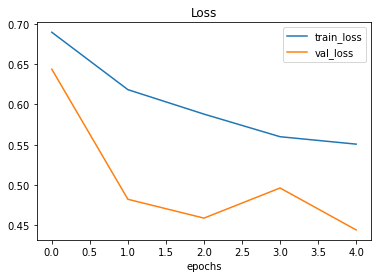

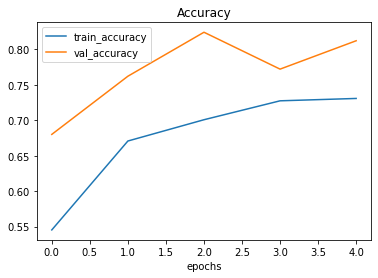

In [87]:
# Plot loss curves
plot_loss_curves(history_7)

🔑 **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features accross a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Sice we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case

> 🛠 **Exercise:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

In [88]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [92]:
# Create model (same as model_1) and increase filter amount to 32
model_8 = Sequential([
    Conv2D(32, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(32, 3, activation="relu"),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile model
model_8.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model on augmented and shuffled data
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


2022-02-27 17:28:49.866242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.7053 - accuracy: 0.5513

2022-02-27 17:29:01.646322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 13s 266ms/step - loss: 0.7053 - accuracy: 0.5513 - val_loss: 0.6221 - val_accuracy: 0.6460
Epoch 2/5
47/47 [==============================] - 12s 259ms/step - loss: 0.5996 - accuracy: 0.6887 - val_loss: 0.6128 - val_accuracy: 0.6220
Epoch 3/5
47/47 [==============================] - 12s 263ms/step - loss: 0.5473 - accuracy: 0.7440 - val_loss: 0.4299 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 12s 256ms/step - loss: 0.4971 - accuracy: 0.7727 - val_loss: 0.4120 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 12s 256ms/step - loss: 0.5021 - accuracy: 0.7713 - val_loss: 0.3384 - val_accuracy: 0.8520


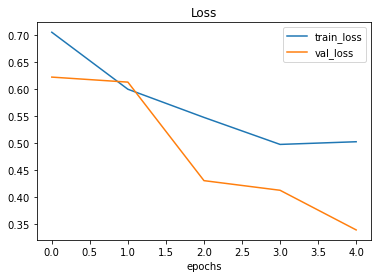

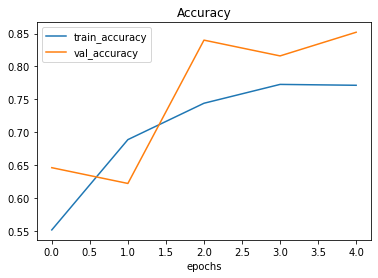

In [93]:
# View loss curves of model_8
plot_loss_curves(history_8)

## Making a prediction with our trained model on our own custom data

In [94]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2022-02-27 17:34:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1,9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1,89M  8,66MB/s    in 0,2s    

2022-02-27 17:34:07 (8,66 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



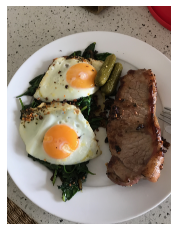

In [97]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [102]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

> 🔑 **Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that you custom data (or new data) is preprocessed into the same format as the data your neural network was trained on.

In [104]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels).
    """
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img

In [105]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.63774514, 0.62205887, 0.5789216 ],
        [0.6504902 , 0.63186276, 0.58970594],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.0509804 , 0.09019608],
        [0.49509805, 0.04215686, 0.07058824],
        [0.5284314 , 0.07745098, 0.10490197]],

       [[0.66176474, 0.64607847, 0.61078435],
        [0.6387255 , 0.62303925, 0.5759804 ],
        [0.6558824 , 0.632353  , 0.5852941 ],
        ...,
        [0.5352942 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460785],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.65196085, 0.6362746 , 0.5892157 ],
        [0.6392157 , 0.61372554, 0.5676471 ],
        [0.6563726 , 0.6269608 , 0.5828432 ],
        ...,
        [0.5313726 , 0.06470589, 0.08039216],
        [0.52745104, 0.06862745, 0.10000001],
        [0.52254903, 0.05196079, 0.0872549 ]],

       ...,

       [[0.49313727, 0.427451  , 0.31029412],
        [0.05

In [110]:
pred = model_8.predict(tf.expand_dims(steak, axis=0))

Looks like our custom image is being put through our model, however it currently outputs a prediction probability. Wouldn't it be nice if we could visualize the image as well as the models prediction?

In [109]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [111]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [116]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with model and plots the image with the
    predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)
    
    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]
    
    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

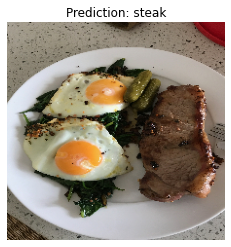

In [117]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg")

Our model works! Let's try it on another image.. This time pizza 🍕

--2022-02-27 18:04:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2,7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2,74M  5,67MB/s    in 0,5s    

2022-02-27 18:04:12 (5,67 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



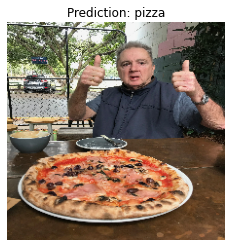

In [118]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

pred_and_plot(model_8, "03-pizza-dad.jpeg")